# Exercise 2
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

#### Import all dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd

#### Generation of data: as CASE 1 - for one-hot encoding

In [2]:
# random seed for reproducibility
np.random.seed(12345)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5
# number of categories
A = 4
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = 0.1
#
a = 0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

for n in range(N):
    # kind of the first slot
    k = np.random.randint(0,2)
    # label
    y[n] = k
    i0=0
    for g in range(G):
        # normal choice
        i = np.random.randint(0, AA[k])
        j = i + i0 + k*A0
        if np.random.random()<q:
            # normal choice
            i = np.random.randint(0,A)
            j = i + i0
        
        if(n<2): 
            print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
        # one-hot encoding
        x[n][j] = 1
        i0= i0 + A
        k = 1 - k
                
    if(n<3): print(x[n], y[n])

print("...")    

L=20, A=4, G=5
k=0, g=0, i0=0, i=1, j=1, AA[k]=2
k=1, g=1, i0=4, i=2, j=6, AA[k]=2
k=0, g=2, i0=8, i=1, j=9, AA[k]=2
k=1, g=3, i0=12, i=1, j=15, AA[k]=2
k=0, g=4, i0=16, i=1, j=17, AA[k]=2
[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0] 0
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0] 1
...


#### Show generated data

In [3]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


### Check if one of the following points improve and/or stabilize the performance of the RBM.
# 1. Use bits [0,1] or [-1,1]. Is reading weights easier in one of the two cases?

In [4]:
# To answer this question we simulate both the cases, starting from the [0, 1] case

# We name "v" for "visible" instead of using x
v = x.copy()
# store in v0, because later we will shuffle v
v0 = np.copy(v)

# We start by considering bits [0, 1]
GAP = 1 
vmin = 0 

# RBM, number of hidden units
M = 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
 [ 0.03644147  0.11050993  0.30163547  0.48889193  0.39505217 -0.50841975]
 [ 0.10786059  0.08978702  0.53065764  0.34768619 -0.78510675 -0.14584864]]
a = [-0.88361978 -0.45766925  0.13869612]
...


#### Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


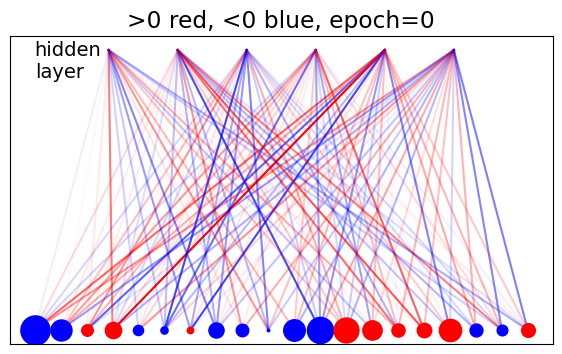

In [5]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [6]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in, wei, bias, DE, info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input =', v_in)
        print('act =', act)
        print('prob =', prob)
        print(DE*act)
        print('output =', v_out)
    return v_out

k = 0
activate(v[k], w, b, GAP, info=True)

input = [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0]
act = [ 0.12148004  0.28349252 -0.95747708  1.3998517   0.20832786 -0.14909014]
prob = [0.53033272 0.57040225 0.27738361 0.80216035 0.55189441 0.46279635]
[ 0.12148004  0.28349252 -0.95747708  1.3998517   0.20832786 -0.14909014]
output = [0 0 0 1 0 0]


array([0, 0, 0, 1, 0, 0])

#### Train

We use the method of fixing the one-hot encoding. We remind that, given the possibilities $[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]$, the energy of each group is given by $E = \sum_i a_i v_i + \sum_{i,\mu}W_{i\mu}v_ih_\mu$. (In theory there would also be the term $\sum_\mu b_\mu h_\mu$. However, since this term is the same for all of the possible encodings, we will neglect it when evaluating the probability of each encoding).

In [7]:
def one_hot_generator(nBlocks, w, h, a):
    encodings = [np.array([1,0,0,0]),np.array([0,1,0,0]),np.array([0,0,1,0]),np.array([0,0,0,1])]
    vf = np.zeros(L) #initialized as zeros
    for block in range(nBlocks):
        #try all encodings and choose one at random with probability given my maxwell boltzmann
        probabilities = []
        for encoding in encodings: #for each possible encoding 1000, 0100, ...
            energy = np.dot(a[block*4: (block+1)*4] + w[block*4:(block+1)*4, ]@h, encoding)
            probabilities.append(np.exp(energy))
        probabilities = probabilities / sum(probabilities) #normalize    
        cumulatives = [sum(probabilities[:i+1]) for i in range(4)] 
        random = np.random.uniform(0.,0.9999)
        choice = 0
        for i in range(4):
            if cumulatives[i] > random:
                choice = i
                break
        #Now choice is index of the encoding we want.
        vf[block*4:(block+1)*4] = encodings[choice]
    return vf

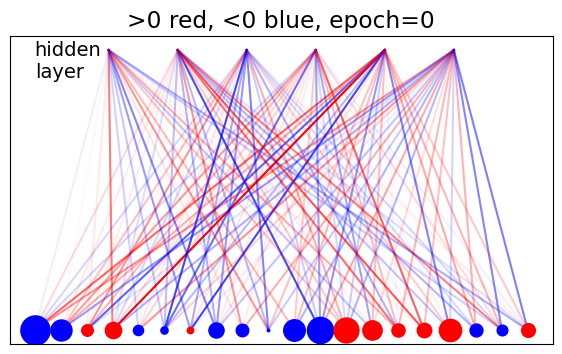

epoch  0
----------- epoch = 0   k= 499   m= 500
dw = [[ 0.074  0.096  0.036  0.106  0.102  0.108]
 [ 0.08   0.096  0.054  0.112  0.066  0.058]
 [-0.034 -0.034  0.    -0.072 -0.01  -0.05 ]
 [-0.186 -0.204 -0.092 -0.238 -0.232 -0.162]
 [-0.184 -0.174 -0.08  -0.252 -0.22  -0.204]
 [ 0.046  0.004  0.048  0.016  0.04   0.008]
 [ 0.014  0.05   0.006  0.068  0.038  0.064]
 [ 0.058  0.074  0.024  0.076  0.068  0.086]
 [-0.09  -0.086 -0.078 -0.072 -0.118 -0.072]
 [-0.032  0.008 -0.006 -0.006 -0.02  -0.038]
 [-0.024 -0.03  -0.01  -0.088 -0.026 -0.028]
 [ 0.08   0.062  0.092  0.074  0.09   0.092]
 [-0.004 -0.006  0.006 -0.002 -0.016 -0.008]
 [ 0.048  0.028  0.05   0.004  0.036  0.014]
 [ 0.024  0.024  0.006  0.01   0.022  0.028]
 [-0.134 -0.092 -0.064 -0.104 -0.116 -0.08 ]
 [-0.05   0.002 -0.042 -0.024 -0.03  -0.028]
 [-0.012  0.072 -0.006  0.03   0.022 -0.002]
 [-0.04  -0.096 -0.012 -0.082 -0.09  -0.014]
 [ 0.036 -0.024  0.058 -0.016  0.024 -0.002]]
da = [ 0.162  0.142 -0.024 -0.28  -0.284  0.0

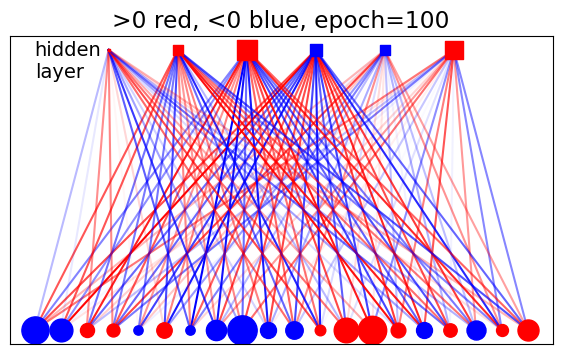

l_rate =  0.5000000000000009
epoch  100
epoch  101
epoch  102
epoch  103
epoch  104
epoch  105
epoch  106
epoch  107
epoch  108
epoch  109
epoch  110
epoch  111
epoch  112
epoch  113
epoch  114
epoch  115
epoch  116
epoch  117
epoch  118
epoch  119
epoch  120
epoch  121
epoch  122
epoch  123
epoch  124
epoch  125
epoch  126
epoch  127
epoch  128
epoch  129
epoch  130
epoch  131
epoch  132
epoch  133
epoch  134
epoch  135
epoch  136
epoch  137
epoch  138
epoch  139
epoch  140
epoch  141
epoch  142
epoch  143
epoch  144
epoch  145
epoch  146
epoch  147
epoch  148
epoch  149
epoch  150
epoch  151
epoch  152
epoch  153
epoch  154
epoch  155
epoch  156
epoch  157
epoch  158
epoch  159
epoch  160
epoch  161
epoch  162
epoch  163
epoch  164
epoch  165
epoch  166
epoch  167
epoch  168
epoch  169
epoch  170
epoch  171
epoch  172
epoch  173
epoch  174
epoch  175
epoch  176
epoch  177
epoch  178
epoch  179
epoch  180
epoch  181
epoch  182
epoch  183
epoch  184
epoch  185
epoch  186
epoch  187
epo

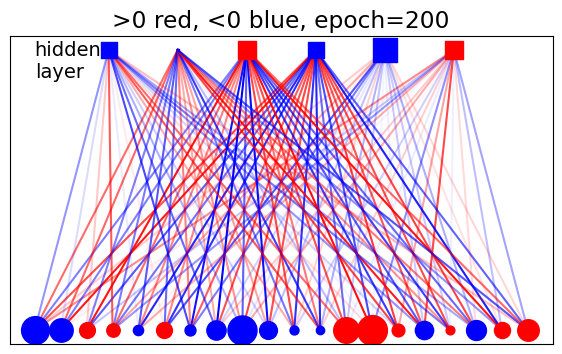

l_rate =  0.33333333333333376


In [8]:
#Metodo dei blocchetti
np.random.seed(12345)
plotgraph(0)

l_rate = 1.0
mini, m = 500, 0 

nBlocks = int(L/4)

SPINS = False  #set to True if you want -1 and 1


if SPINS:
    for encoding in encodings:
        encoding = 2*encoding - np.array([1,1,1,1])

for epoch in range(200):
    print("epoch ", epoch)
    l_rate_m = l_rate/mini
    
    for k in range(N): #for each datapoint
        if m == 0:
            #we initialize the sum for the aveage 
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
    
        #Step 1: change hidden variables
        h = activate(v[k],w,b,GAP)

        #Step 2: change visible variables
        
        vf = one_hot_generator(nBlocks, w, h, a)
        
        #Step 3: one more h and then update values
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD -- simplest as possible
            dw = l_rate_m*(vh_data - vh_model)  # gradient variable
            da = l_rate_m*(v_data - v_model)    # gradient variable
            db = l_rate_m*(h_data - h_model)    # gradient variable
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch==99 or epoch == 199:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [9]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl=1000.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0) #new data
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = one_hot_generator(nBlocks, w, h, a)
# difference between fantasy and data
diff = (v1 - v0)/2


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=10000
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

#df0s = df0.style.set_table_attributes("style='display:inline'")
#df1s = df1.style.set_table_attributes("style='display:inline'")
#df0s.applymap(is_one)
#df1s.applymap(is_one)
#sty = [dict(selector="caption",props=[("font-size", "150%")])]
#df0s.set_caption('Original').set_table_styles(sty)
#df1s.set_caption('Denoised').set_table_styles(sty)

#display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

/tmp/ipykernel_38728/421369049.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function


In [10]:
# Programma che controlla se i dati sono giusti 

scores = 0 #fa +1 per ogni riga giusta

#Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
# col - riga

for nRiga in range(N1): 
    #Controlla se questa riga è con alternanza sinistra destra
    riga = df1.iloc[nRiga,:]
    positions = [] 
    positionsLettere = [] #scritti "destra" "sinistra"
    for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
        blocchetto = riga[block*4:(block+1)*4]
        indice = 0
        for i in range(4):
            if blocchetto[block*4 + i] == 1:
                indice = i
        if indice < 2:
            positions.append(0) # 0 --> sinistra
            positionsLettere.append("sinistra ")
        else:
            positions.append(1) # 1 --> destra
            positionsLettere.append("destra ")
    corretto = True
    for indice in range(len(positions)-1): #per ogni 0 1 etc
        if positions[indice] == positions[indice+1]:
            corretto = False
    if corretto == True:
        scores += 1
    if corretto == False:
        print(nRiga, " è sbagliata")
        print(positionsLettere)
        
print("Score: ", scores/N1)   

11  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
21  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
23  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
24  è sbagliata
['destra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
26  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
33  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
42  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
53  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
55  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
65  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
76  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
78  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
92  è sbagliata
['sinistra ', 'destra ', 'destra ', 'sinistra ', 'sinistra ']
96

1453  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
1484  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
1486  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
1487  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
1491  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
1507  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
1514  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
1519  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'sinistra ']
1520  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
1521  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
1522  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
1529  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
1533  è sbagliata
['sinistra ', 'destra ',

2191  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
2201  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
2211  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
2223  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
2245  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
2247  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
2253  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
2256  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
2262  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
2270  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
2278  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
2294  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
2305  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 's

3658  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
3660  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
3661  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
3667  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
3678  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
3680  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
3684  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
3686  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'sinistra ']
3691  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
3698  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
3707  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
3712  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
3714  è sbagliata
['destra ', 'destra ', 'destra ', 'sin

4911  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
4912  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
4922  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'destra ', 'destra ']
4927  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
4933  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
4934  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
4936  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
4965  è sbagliata
['destra ', 'destra ', 'sinistra ', 'sinistra ', 'destra ']
4975  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
5007  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
5015  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
5016  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
5024  è sbagliata
['sinistra ', 'sinistra ', 'sinistra '

6337  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
6339  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
6343  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
6344  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'destra ']
6359  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
6367  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
6372  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
6394  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
6405  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
6406  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
6408  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
6411  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
6415  è sbagliata
['sinistra ', 'destra ', 'destra '

7104  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
7108  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
7116  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
7117  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
7119  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
7122  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
7127  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
7134  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
7135  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
7138  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
7154  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
7160  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
7162  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 's

7853  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
7854  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
7871  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
7878  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
7885  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'sinistra ']
7886  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
7903  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
7907  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
7910  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
7918  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
7923  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
7925  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
7927  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 's

8632  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
8635  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
8646  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
8652  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
8654  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
8662  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
8665  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
8677  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
8684  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
8693  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
8694  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
8697  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
8706  è sbagliata
['sinistra ', 'destra 

9419  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
9434  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
9436  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
9439  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
9466  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
9470  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
9472  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
9481  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
9482  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'sinistra ']
9488  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
9489  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
9490  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'sinistra ', 'sinistra ']
9507  è sbagliata
['destra ', 'destra ', 'sinist

In [11]:
diff

array([[ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5, ...,  0. , -0.5,  0.5],
       ...,
       [-0.5,  0.5,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  0. ]])

In [12]:
diff.mean(), diff.std()

(0.0, 0.2578226134379993)